In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from westgate.flaml_model import *
import pandas as pd
from westgate.combochart import combo_chart
import logging

In [3]:
logger = logging.getLogger('westgate.flaml_model')
fhandler = logging.FileHandler(filename='metrics.log', mode='w')
formatter = logging.Formatter('%(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.INFO)

In [4]:
data_folder = 'C:/Users/karim/Documents/westgate/data/training/'

In [5]:
accepted_2022_df = pd.read_csv(data_folder + 'loan_outcomes_2022.csv', encoding='latin')
refused_2022_df = pd.read_csv(data_folder + 'refusal2022.csv', encoding='latin')


C:\Users\karim\AppData\Local\Temp\ipykernel_23532\2059859133.py:1: DtypeWarning: Columns (741) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_2022_df = pd.read_csv(data_folder + 'loan_outcomes_2022.csv', encoding='latin')


In [6]:
refused_2022_df['request_date'].isna().sum()

0

In [7]:
accepted_2022_df.head()

,Id,account_age_days,active_days_trend,auto_loan_payment_frequency,average_closing_balance_day_after_employer_income,average_closing_balance_day_after_government_income,average_closing_balance_day_after_income,average_closing_balance_day_of_employer_income,average_closing_balance_day_of_government_income,average_closing_balance_day_of_income,...,principal,request_date,total_paid,fees_paid,first_repayment_date,last_repayment_date,repayment_count,loan_application_id,borrower_id,error
0,fe5152b3-de9b-43ad-952e-9d8256fa4dbf,411.0,1.13,NONE_DETECTED,2255.66,1953.4,2223.04,2285.82,1653.16,878.06,...,400,2022-01-03 0:00,799.56,0.0,2022-01-21 0:00,2022-04-29 0:00,8.0,IF1000001770,CID000001770,NaN
1,cca4af83-7da9-4bf1-896b-18f1e7e79cd6,91.0,0.81,NONE_DETECTED,1773.62,1544.31,1406.45,2877.36,1955,539.54,...,300,2022-01-03 0:00,0.00,NaN,NaN,NaN,NaN,IF1000001985,CID000001985,NaN
2,aaf584ec-b257-4d75-8fb6-21c542950515,91.0,0.91,NONE_DETECTED,1391.54,734.61,1297.69,2412.04,791.78,1096.63,...,300,2022-01-03 0:00,587.58,0.0,2022-01-19 0:00,2022-03-30 0:00,6.0,IF1000001938,CID000001938,NaN
3,7188c8d3-7ded-459a-9c6e-313f4938c3b5,91.0,1.01,NONE_DETECTED,324.16,1461.1,459.23,76.91,1732.94,226.30,...,400,2022-01-03 0:00,799.56,0.0,2022-01-13 0:00,2022-04-21 0:00,8.0,IF1000001987,CID000001987,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,300,2022-01-04 0:00,189.86,0.0,2022-01-13 0:00,2022-02-10 0:00,2.0,IF1000002247,CID000002247,NoTransactions


In [8]:
refused_2022_df['Id'] = refused_2022_df['loginId']

In [10]:
accepted_2023_df = pd.read_csv(data_folder + 'janToNov2023LoansAccepted.csv')
refused_2023_df = pd.read_csv(data_folder + 'refusal2023_IF.csv')

C:\Users\karim\AppData\Local\Temp\ipykernel_23532\3334318270.py:1: DtypeWarning: Columns (394) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_2023_df = pd.read_csv(data_folder + 'janToNov2023LoansAccepted.csv')


In [12]:
refused_2023_df['Id'] = refused_2023_df['loginId']

In [13]:
accepted_2023_df['gender'] = accepted_2023_df['gender'].str.lower()

In [14]:
refused_2023_df.rename(columns={'requestDate': 'request_date'}, inplace=True)

In [15]:
refused_2023_df['request_date'].isna().sum()

0

In [16]:
refused_2024_IF_df = pd.read_csv(data_folder + 'refusal2024_IF.csv')
refused_2024_PR_df = pd.read_csv(data_folder + 'refusal2024_PR.csv', encoding='latin')

refused_2024_df = pd.concat([refused_2024_IF_df, refused_2024_PR_df])

In [17]:
refused_2024_df['Id'] = refused_2024_df['loginId']

In [18]:
refused_2024_df.rename(columns={'requestDate': 'request_date'}, inplace=True)

In [19]:
refused_2024_df['request_date'].isna().sum()

0

In [20]:
accepted_df = pd.concat([accepted_2022_df, accepted_2023_df])

In [21]:
refused_df = pd.concat([refused_2022_df, refused_2023_df, refused_2024_df])

In [22]:
refused_df['recurring_deposits_90_days'] = (
    refused_df['recurring_deposits_current_month'] + 
    refused_df['recurring_deposits_previous_month'] +
    refused_df['recurring_deposits_2_months_ago']
)

refused_df['sum_micro_loans_60_days'] = (
    refused_df['sum_micro_loan_payments_current_month'] + 
    refused_df['sum_micro_loan_payments_previous_month'] 
)

refused_df['recurring_deposits_90_days'] = (
    refused_df['recurring_deposits_current_month'] + 
    refused_df['recurring_deposits_previous_month'] +
    refused_df['recurring_deposits_2_months_ago']
)

refused_df['sum_micro_loans_60_days'] = (
    refused_df['sum_micro_loan_payments_current_month'] + 
    refused_df['sum_micro_loan_payments_previous_month'] 
)

In [23]:
print('# loans before auto-refusal: ' + str(len(refused_df)))

refused_df = refused_df[refused_df['account_age_days'] >= 85]

refused_df = refused_df[refused_df['count_nsf_90_days'] <= 8]

refused_df = refused_df[refused_df['count_nsf_30_days'] <= 6]

refused_df = refused_df[refused_df['count_stop_payment_90_days'] <= 4]

#refused_df = refused_df[refused_df['recurring_deposits_90_days']/3.0 >= 1800] <-- filers way too much

#refused_df = refused_df[refused_df['sum_micro_loans_60_days'] <= 1000]

print('# loans after auto-refusal: ' + str(len(refused_df)))

# loans before auto-refusal: 96677
# loans after auto-refusal: 78528


In [24]:
len(accepted_df)

19597

In [25]:
default_model = UWModel(model_name='default', model_version='1.0', basefolder='../default_model/')

In [26]:
accepted_filtered_df = default_model.filter_df(accepted_df)

261 rows removed by threshold filtering
458 Rows with 'error' column not NA have been discarded.
5 Rows with 'Id' column NA have been discarded.
4 Rows with 'request_date' column NA have been discarded.
59 Rows with 'account_age_days' column not positive have been discarded.


In [27]:
len(accepted_filtered_df)

18810

In [28]:
refused_df['request_date'].isna().sum()

0

In [29]:
accepted_filtered_df['refused'] = 0
refused_df['refused'] = 1

df = pd.concat([accepted_filtered_df, refused_df])

In [31]:
len(df)

97338

In [32]:
df['refused'].value_counts(normalize=True)

refused
1    0.806756
0    0.193244
Name: proportion, dtype: float64

In [50]:
refusal_model = LendingModel(model_name='refusal', model_version='0.4')

In [51]:
X_train, X_test, y_train, y_test, extra = refusal_model.split_data(df, split_criteria=0.15)

In [52]:
'sum_non_employer_income_current_month' in X_train.columns

True

In [53]:
extra.keys()

dict_keys(['train_request_date', 'test_request_date', 'train_dob', 'test_dob', 'train_Id', 'test_Id', 'train_refusalReason', 'test_refusalReason'])

In [54]:
len(X_train)

82737

In [55]:
X_train, X_test = refusal_model.feature_engineer(X_train, X_test)

Error calculating age with dob ########## and request_date 2024-04-03 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2022-09-14 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2024-03-06 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2023-11-10 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2022-10-03 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2024-04-03 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2023-03-30 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2024-04-03 00:00:00
Unknown string format: ##########
Error calculating age with dob ########## and request_date 2022-06-15 00:00:00
Unknown string fo

In [56]:
len(X_train),len(y_train)

(82737, 82737)

In [57]:
filter = ~X_train['age'].isna()
X_train = X_train.loc[filter]
y_train = y_train.loc[filter]

In [58]:
filter = ~X_test['age'].isna()
X_test = X_test.loc[filter]
y_test = y_test.loc[filter]

In [59]:
len(X_train), len(y_train)

(82726, 82726)

In [60]:
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [61]:
X_train.isna().sum().sum()

0

In [62]:
r = X_train, y_train, X_test, y_test, extra

In [63]:
len(X_test), len(y_test)

(14601, 14601)

In [64]:
y_test.value_counts(normalize=True)

refused
1    0.809808
0    0.190192
Name: proportion, dtype: float64

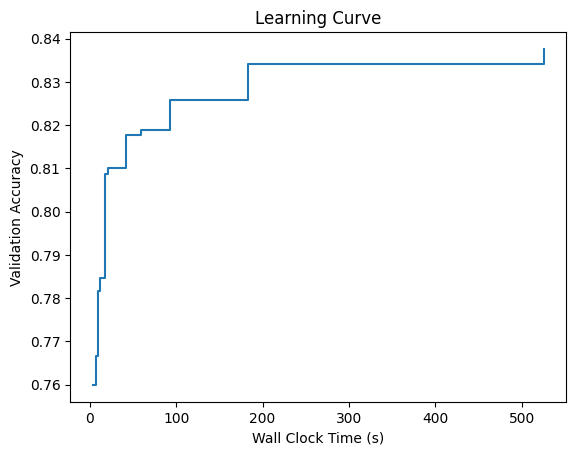

Saving X_test_refusal.csv


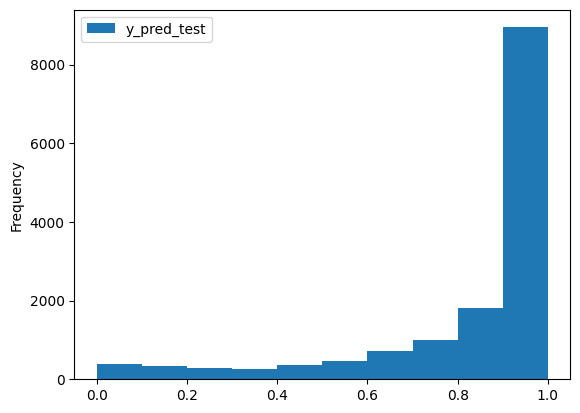

In [65]:
y_pred_proba, y_pred, extra = refusal_model.fit(*r, 
                                                time_budget=600, 
                                                threshold=0.55)

In [66]:
refusal_model.feat_imp()

,variable,imp
5,count_nsf_90_days,0.075791
4,count_nsf_30_days,0.043016
8,recurring_deposits_current_month,0.042309
6,count_stop_payment_90_days,0.037605
0,account_age_days,0.035036
12,sum_employer_income_previous_month,0.034185
10,sum_employer_income_2_months_ago,0.032609
25,sum_micro_loan_payments_2_months_ago,0.030932
31,sum_total_income_2_months_ago,0.026980
27,sum_micro_loan_payments_previous_month,0.026509


In [67]:
y_pred_proba_test = refusal_model.predict_proba(X_test, filter=False, engineer=False)

<Axes: ylabel='Frequency'>

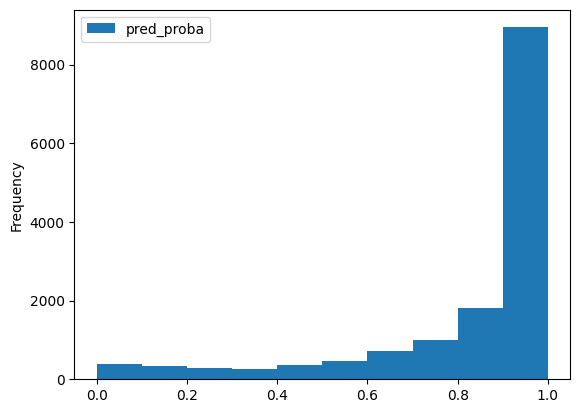

In [68]:
y_pred_proba_test.plot.hist()

In [69]:
perf_df = pd.DataFrame({'y_pred': y_pred_proba, 'y_test': y_test})

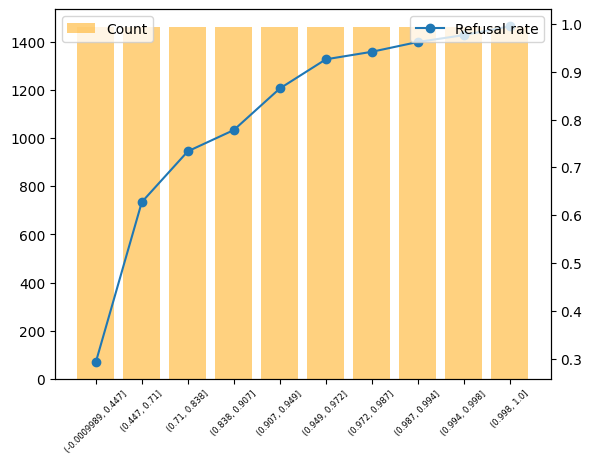

In [70]:
fig = combo_chart(perf_df, xvar='y_pred', q=10, yvar='y_test', ylabel='Refusal rate')

In [71]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

In [72]:
refusal_model.automl.retrain_from_log(
    'log_refusal.log',
    X_full,
    y_full,
    train_best=True,
    train_full=True,
    time_budget=60
)

[flaml.automl.logger: 06-03 11:35:55] {804} INFO - log file name log_refusal.log
[flaml.automl.logger: 06-03 11:35:55] {857} INFO - estimator = xgboost, config = {'n_estimators': 144, 'max_leaves': 4, 'min_child_weight': 10.30666503597474, 'learning_rate': 0.23511987355535005, 'subsample': 1.0, 'colsample_bylevel': 0.7434035055937628, 'colsample_bytree': 0.7062896312160846, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.22219592499709967}, #training instances = 97327
[flaml.automl.logger: 06-03 11:35:58] {890} INFO - retrain from log succeeded


58.92676568031311

In [73]:
percentiles = np.percentile(y_pred_proba, range(5,100,5))

In [74]:
refusal_model.percentiles = {p:v for p,v in zip(range(5,100,5), percentiles)}

In [75]:
refusal_model.save()

In [65]:
y_pred_proba = refusal_model.predict_proba(X_full, filter=False, engineer=False)['pred_proba']

<Axes: ylabel='Frequency'>

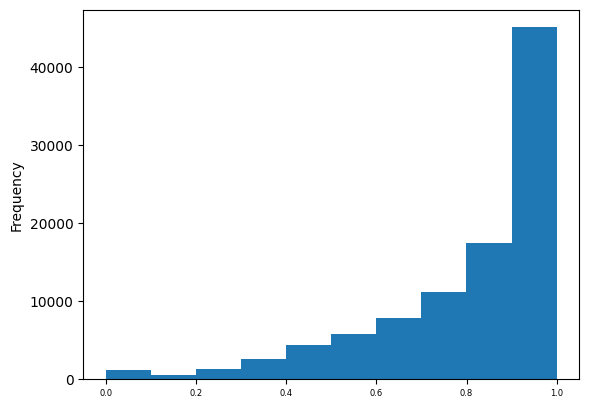

In [66]:
y_pred_proba.plot.hist()

In [67]:
y_pred_proba_bins = pd.cut(y_pred_proba, 10, duplicates = 'drop')
print('\ny_pred_proba distribution:')
print(y_pred_proba_bins.value_counts())


y_pred_proba distribution:
pred_proba
(0.9, 1.0]          45102
(0.8, 0.9]          17466
(0.7, 0.8]          11205
(0.6, 0.7]           7846
(0.5, 0.6]           5786
(0.4, 0.5]           4338
(0.3, 0.4]           2564
(0.2, 0.3]           1290
(-0.000998, 0.1]     1245
(0.1, 0.2]            485
Name: count, dtype: int64


In [77]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.where(y_pred_proba >= refusal_model.percentiles[15], 1, 0)

print(classification_report(y_full, y_pred))

print(y_pred.sum() / len(y_pred))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56     18810
           1       0.89      0.93      0.91     78517

    accuracy                           0.85     97327
   macro avg       0.76      0.71      0.73     97327
weighted avg       0.84      0.85      0.84     97327

0.8500005137320579


In [70]:
refusal_model.save()

### Debugging

In [256]:
refusal_model.predict_proba(X_train, filter=False, engineer=False)['pred_proba']

AttributeError: 'NoneType' object has no attribute 'predict_proba'

In [189]:
logger.removeHandler(logger.handlers[0])
logger.handlers[0].close()

In [4]:
refusal_model = load_model('refusal')

In [5]:
refusal_model.features_in

['request_date',
 'dob',
 'account_age_days',
 'count_nsf_90_days',
 'count_nsf_30_days',
 'count_stop_payment_90_days',
 'sum_micro_loan_payments_current_month',
 'sum_micro_loan_payments_previous_month',
 'sum_micro_loan_payments_2_months_ago',
 'recurring_deposits_current_month',
 'recurring_deposits_previous_month',
 'recurring_deposits_2_months_ago',
 'count_active_days',
 'sum_total_income_current_month',
 'sum_total_income_previous_month',
 'sum_total_income_2_months_ago',
 'sum_loan_payments_current_month',
 'sum_loan_payments_previous_month',
 'sum_loan_payments_2_months_ago',
 'sum_loan_deposits_30_days',
 'sum_loan_deposits_60_days',
 'sum_loan_deposits_90_days',
 'sum_government_income_current_month',
 'sum_government_income_previous_month',
 'sum_government_income_2_months_ago',
 'sum_employment_insurance_income_current_month',
 'sum_employment_insurance_income_previous_month',
 'sum_employment_insurance_income_2_months_ago',
 'sum_employer_income_current_month',
 'sum_emp